In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\HP\Desktop\Data Science\Data Sets For Practice\student_clustering.csv')
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


In [3]:
df.shape

(200, 2)

# Implementation for computing Hopkins' Statistic:


* A value for Hopkins' Statistic higher than 0.75 indicates a clustering tendency at the 90% confidence level.


* We can interpret Hopkins' statistic in the following manner:


* If the value is between {0.01, ...,0.3}, the data is regularly spaced.


* If the value is around 0.5, it is random.


* If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [4]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np

# function to compute hopkins's statistic for the dataframe X
def hopkins_statistic(X):
    
    X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0]*0.05) #0.05 (5%) based on paper by Lawson and Jures
    
    
    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))
    
    
    
    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]
   
    
    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=1)
    nbrs=neigh.fit(X)
    
    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour
    
    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]
    
 
    
    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)
    
    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [5]:
hopkins_statistic(df)

0.7768183143223332

In [6]:
l = [] #list to hold values for each call
for i in range(20):
    H=hopkins_statistic(df)
    l.append(H)
#print average value:
np.mean(l)

0.9110438147176156

# Note:-

### 1) After you get the data, the first thing you have to do is to visualize your data and see according to you how many clusters will make of the data. This can be done by PCA.

### 2) Before Making Clusters, we do experiment that scaled data results in good cluster making or unscaled data.

### 3) After applying any clustering algorithm, we have to visualize the clusters, to check it's quality.

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df)

scaled_data = pd.DataFrame(scaled_data)

scaled_data

,0,1
0,0.112766,0.131579
1,0.276596,0.789474
2,0.800000,0.263158
3,0.780851,0.368421
4,0.180851,0.710526
...,...,...
195,0.017021,0.157895
196,0.844681,0.921053
197,0.265957,0.763158
198,0.346809,0.657895


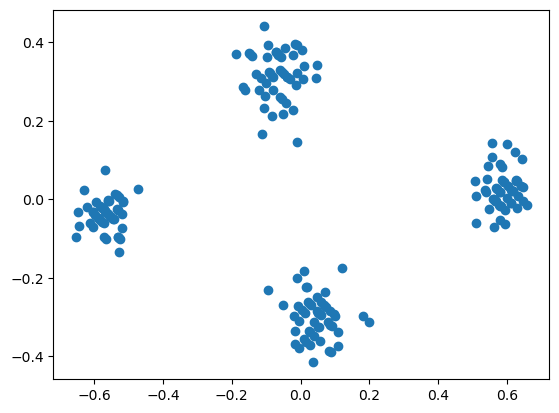

In [8]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(scaled_data)

# Create a scatter plot of the clusters
# create a scatter plot of the data points colored by cluster
plt.scatter(df_pca[:, 0], df_pca[:, 1])
plt.show()

# Model Building

In [9]:
from sklearn.cluster import KMeans

In [10]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(scaled_data)

KMeans(n_clusters=5)

In [11]:
cluster_labels = kmeans.labels_

cluster_labels

array([0, 3, 4, 1, 3, 3, 1, 2, 3, 4, 0, 3, 1, 0, 3, 4, 3, 4, 3, 3, 1, 0,
       4, 0, 0, 1, 0, 2, 4, 3, 2, 3, 2, 3, 1, 1, 2, 3, 0, 3, 0, 4, 4, 0,
       2, 2, 4, 3, 2, 3, 0, 0, 2, 1, 2, 3, 3, 2, 3, 2, 3, 4, 4, 2, 0, 2,
       4, 0, 3, 4, 3, 2, 4, 0, 3, 2, 3, 2, 0, 4, 4, 2, 3, 0, 2, 0, 2, 3,
       2, 3, 2, 2, 4, 0, 4, 4, 2, 4, 0, 2, 3, 0, 0, 2, 0, 0, 4, 0, 2, 2,
       4, 2, 3, 3, 4, 2, 4, 3, 2, 0, 0, 3, 4, 2, 1, 0, 1, 3, 0, 1, 4, 3,
       0, 0, 3, 2, 3, 0, 1, 1, 4, 0, 3, 0, 0, 2, 0, 2, 3, 0, 2, 0, 2, 2,
       0, 4, 3, 2, 3, 4, 0, 2, 3, 4, 2, 0, 3, 0, 0, 2, 2, 3, 2, 0, 0, 1,
       2, 3, 0, 2, 2, 3, 3, 3, 1, 0, 4, 4, 2, 3, 4, 4, 0, 0, 4, 0, 2, 3,
       3, 2])

# Finding the optimal number of cluster using Elbow Curve

* The elbow method is used in K-means clustering to identify the optimal number of clusters to use for a given dataset.


* The method works by plotting the within-cluster sum of squares(WCSS) on y-axis againt the number of clusters on x-axis.


* The WCSS is the sum of the squared distances between each data point and the centroid of its assigned cluster. As the number of clusters increases, the WCSS tends to decrease because the data points are closer to their respective centroids.


* The elbow method involves visually inspecting the plot and identifying the point of inflection or "elbow" where the rate of decrease in WCSS begins to slow down. The number of clusters corresponding to this point is considered to be the optimal number of clusters for the given dataset. 


*  Where the curve is stabalize is called elbow point.


* To plot elbow plot add the WCSS of clusters.

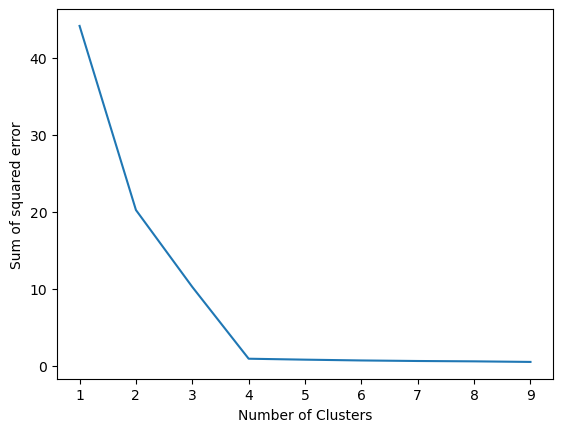

In [12]:
wcss = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(scaled_data)
    wcss.append(km.inertia_)
    
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,wcss)

### as we see 3 clusters are best for our dataset 

# Silhouette Analysis

* Silhouette analysis is a method for evaluating the quality of clustering results. It provides a way to quantify how well each data point fits into its assigned cluster and how separated the clusters are from each other.


* The technique produces a silhouette score for each data point, which is a measure of how similar that point is to its own cluster compared to other clusters. The silhouette score ranges from -1 to +1, with higher values indicating better clustering. 


* We can use Silhouette Analysis to find the optimanl number of clusters by averaging the Silhouette Score of K clusters.


* We also use it as a evaulating metric to check the quality of clusters.


In silhouette analysis, each data point is first assigned to a cluster based on a clustering algorithm. Then, the silhouette score is calculated for each data point as follows:


* Compute the average distance between the data point and all other points in the same cluster. This is denoted as a(i).


* Compute the average distance between the data point and all points in the nearest cluster (i.e., the cluster that the data point is not a part of). This is denoted as b(i).


* Compute the silhouette score as (b(i) - a(i)) / max(a(i), b(i)).


* Compute the silhouette score of a cluster by averaging the silhouette score of all data points present in a cluster.

For n_clusters = 2, the average silhouette score is 0.534
For n_clusters = 3, the average silhouette score is 0.658
For n_clusters = 4, the average silhouette score is 0.859
For n_clusters = 5, the average silhouette score is 0.735
For n_clusters = 6, the average silhouette score is 0.609
For n_clusters = 7, the average silhouette score is 0.495
For n_clusters = 8, the average silhouette score is 0.497
For n_clusters = 9, the average silhouette score is 0.475
For n_clusters = 10, the average silhouette score is 0.492


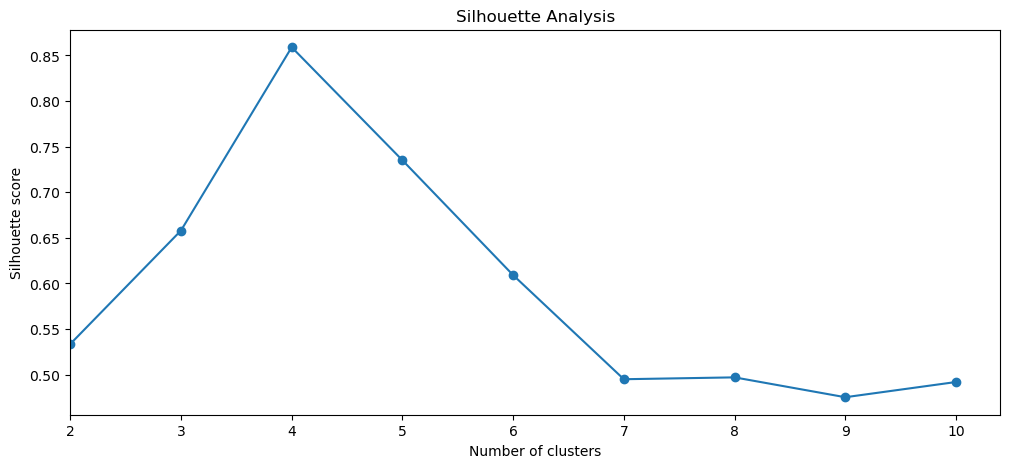

In [13]:
from sklearn.metrics import silhouette_score, silhouette_samples

# Range of number of clusters to try
range_n_clusters = range(2, 11)

# Compute silhouette scores
silhouette_scores = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is {silhouette_avg:.3f}")
    
# Plot silhouette scores as a line plot

fig = plt.figure(figsize=(12, 5)) # (width, height)
plt.plot(range_n_clusters, silhouette_scores, '-o')
plt.xlim(left=2)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.title("Silhouette Analysis")
plt.show()

# OR

For n_clusters=2, the average silhouette score is 0.534


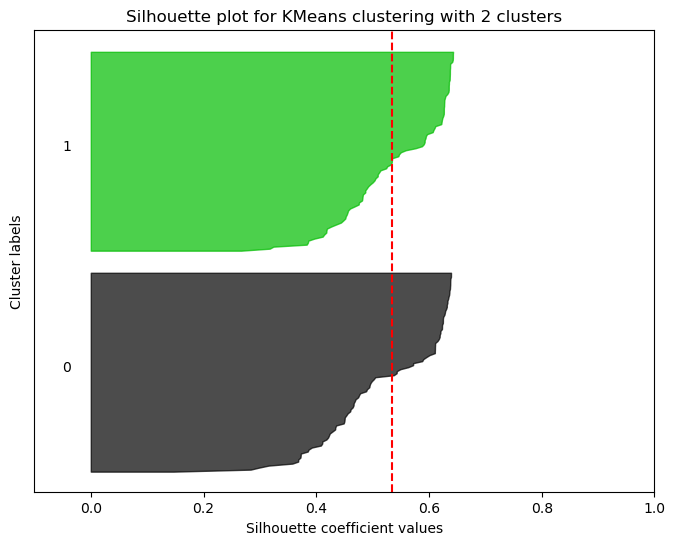

For n_clusters=3, the average silhouette score is 0.658


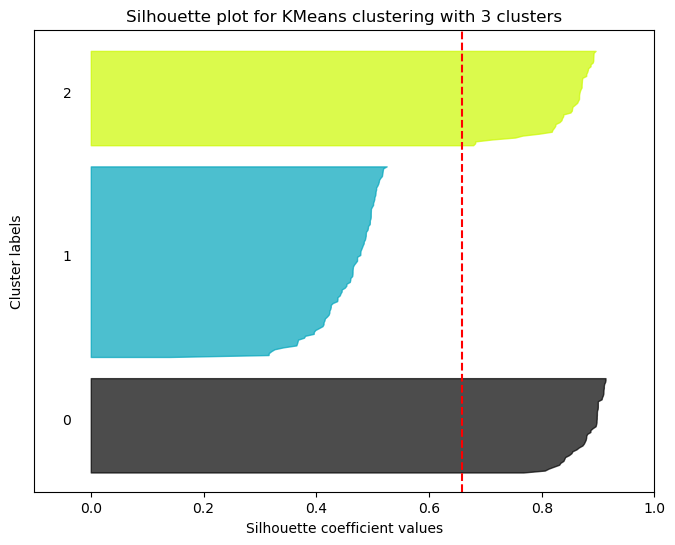

For n_clusters=4, the average silhouette score is 0.859


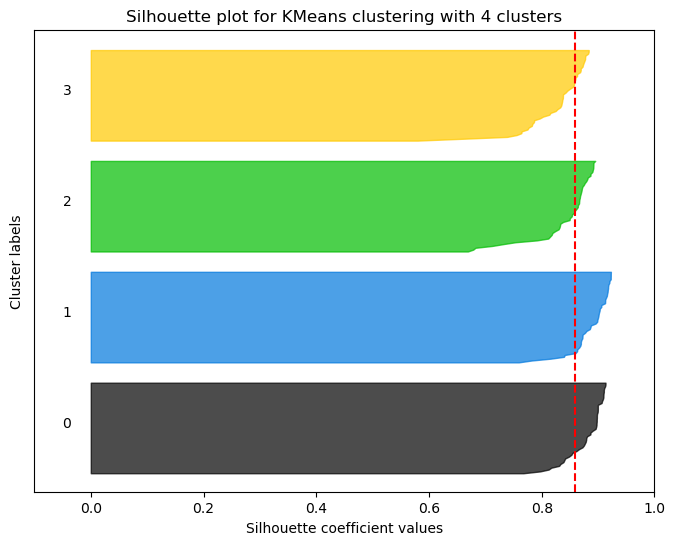

For n_clusters=5, the average silhouette score is 0.735


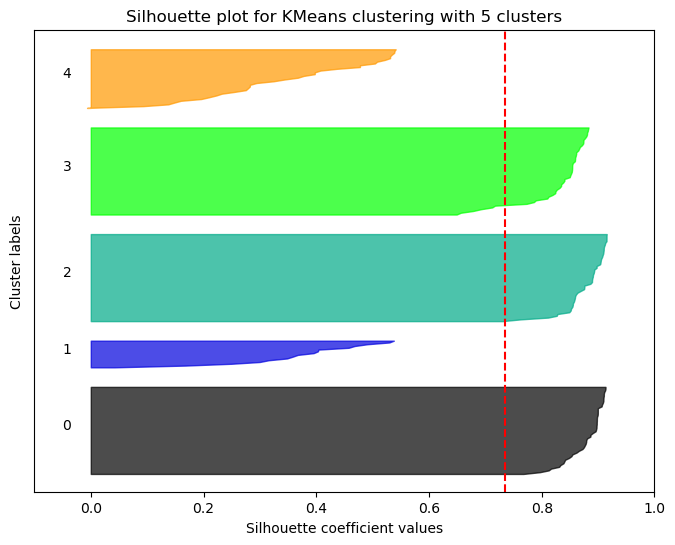

In [14]:
# initialize the range of number of clusters to evaluate
clusters_range = range(2, 6)

# loop through each number of clusters to calculate silhouette score and plot the silhouette plot
for n_clusters in clusters_range:
    # fit KMeans clustering model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    
    # calculate silhouette score
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    print(f"For n_clusters={n_clusters}, the average silhouette score is {silhouette_avg:.3f}")
    
    # plot the silhouette plot
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(scaled_data) + (n_clusters + 1) * 10])
    silhouette_vals = silhouette_samples(scaled_data, cluster_labels)
    y_lower = 10
    
    for i in range(n_clusters):
        # aggregate silhouette scores for samples belonging to the ith cluster
        ith_cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
        ith_cluster_silhouette_vals.sort()
        size_cluster_i = ith_cluster_silhouette_vals.shape[0]
        y_upper = y_lower + size_cluster_i

        # plot silhouette plot for the ith cluster
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_vals,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    
    ax.set_xlabel("Silhouette coefficient values")
    ax.set_ylabel("Cluster labels")
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])
    plt.title(f"Silhouette plot for KMeans clustering with {n_clusters} clusters")
    plt.show()

# OR

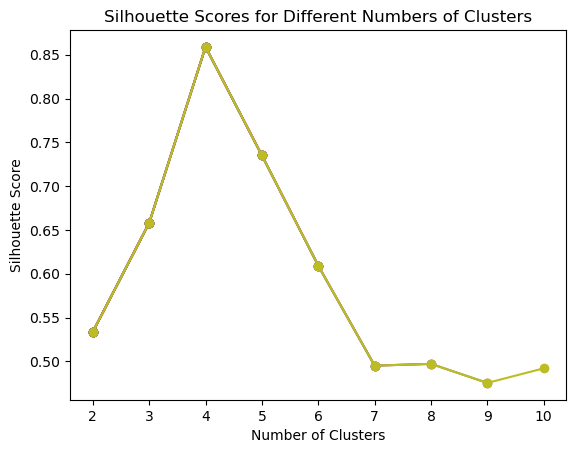

In [15]:
# Initialize empty lists to store silhouette scores and number of clusters
silhouette_scores = []
num_clusters = []

# Try clustering for different number of clusters
for n_clusters in range(2, 11):
    # Initialize KMeans with n_clusters and fit the scaled data
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(scaled_data)
    # Predict the cluster labels for each data point
    cluster_labels = kmeans.predict(scaled_data)
    # Calculate the silhouette score for the clustering
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    # Append the score and number of clusters to the respective lists
    silhouette_scores.append(silhouette_avg)
    num_clusters.append(n_clusters)
    # Plot the silhouette scores for each number of clusters
    plt.plot(num_clusters, silhouette_scores, '-o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores for Different Numbers of Clusters')

## Max Silhouette Score as k = 4, Hence 4 Clusters is the right option but we check again with the help of cluster visualization.

# Visualization of Clusters (K=2)

* It is a technique by which we visualize the quality of clusters.

In [16]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(scaled_data)
clusters=kmeans.labels_

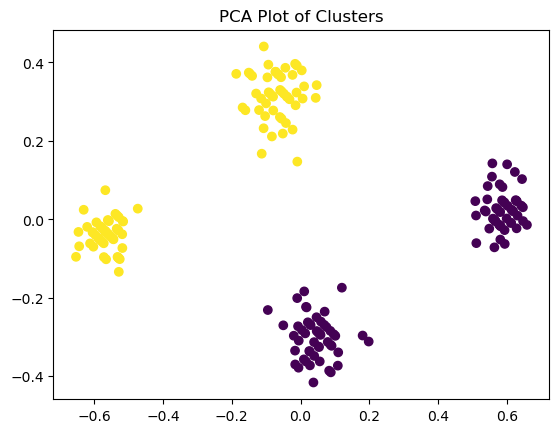

In [17]:
# Perform PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(scaled_data)

# Create a scatter plot of the clusters
# create a scatter plot of the data points colored by cluster
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans.labels_)
plt.title('PCA Plot of Clusters')
plt.show()

In [18]:
df_pca

array([[ 5.39204493e-01,  2.00005494e-02],
       [-1.55086435e-02, -3.69818665e-01],
       [-6.62757949e-02,  3.70710215e-01],
       [-1.20753099e-01,  2.78627439e-01],
       [ 1.08549348e-01, -3.72875745e-01],
       [ 5.66536877e-02, -2.93065566e-01],
       [-1.60498033e-01,  2.78252859e-01],
       [-5.16223697e-01, -5.44279585e-03],
       [ 5.38865372e-02, -3.25493107e-01],
       [-4.01038105e-02,  3.13197748e-01],
       [ 6.58887604e-01, -1.40904645e-02],
       [ 4.04691601e-03, -2.82291291e-01],
       [-1.03068072e-01,  2.63297763e-01],
       [ 5.60104980e-01,  1.88365867e-03],
       [ 1.01221811e-01, -2.96871807e-01],
       [-9.27105822e-02,  3.23972023e-01],
       [ 8.32739811e-02, -3.85792788e-01],
       [ 4.69763971e-02,  3.42193629e-01],
       [-5.15115335e-03, -3.09144404e-01],
       [-5.86226519e-03, -3.78180307e-01],
       [-9.37143982e-03,  1.47253803e-01],
       [ 6.17086632e-01,  2.21433171e-02],
       [ 4.42092466e-02,  3.09766088e-01],
       [ 6.

PCA : Principal Component Analysis, it will reduce the dimension of data set to 2d or 3d. It is not possible to plot all the features of dataset in a single graph. So, we use PCA to reduce the dimension then we will see the whole dataset or datapoints in a single graph.

# Visualization of Clusters (K=3)

In [19]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_data)
cluster=kmeans.labels_

Text(0.5, 1.0, 'PCA Plot of Clusters')

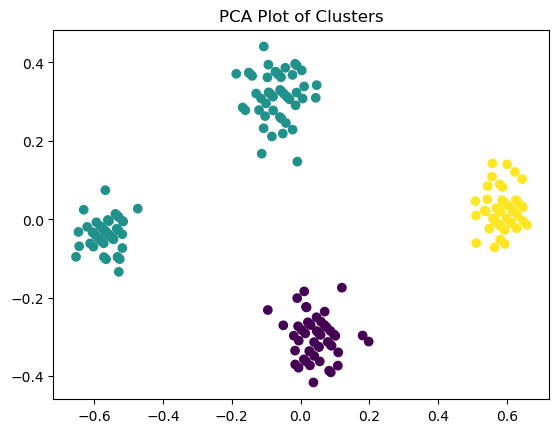

In [20]:
# Create a scatter plot of the clusters
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster)
plt.title("PCA Plot of Clusters")

# Visualization of Clusters (K=4)

In [21]:
kmeans = KMeans(n_clusters=4,max_iter=100)
kmeans.fit(scaled_data)
cluster=kmeans.labels_

Text(0.5, 1.0, 'PCA Plot of Clusters')

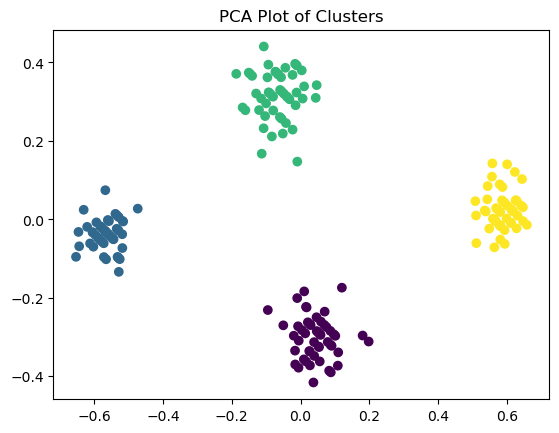

In [22]:
# Create a scatter plot of the clusters
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster)
plt.title("PCA Plot of Clusters")

## As we see if we make 4 clusters then it is the right option.

In [23]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled_data)
kmeans.labels_

array([3, 1, 0, 0, 1, 1, 0, 2, 1, 0, 3, 1, 0, 3, 1, 0, 1, 0, 1, 1, 0, 3,
       0, 3, 3, 0, 3, 2, 0, 1, 2, 1, 2, 1, 0, 0, 2, 1, 3, 1, 3, 0, 0, 3,
       2, 2, 0, 1, 2, 1, 3, 3, 2, 0, 2, 1, 1, 2, 1, 2, 1, 0, 0, 2, 3, 2,
       0, 3, 1, 0, 1, 2, 0, 3, 1, 2, 1, 2, 3, 0, 0, 2, 1, 3, 2, 3, 2, 1,
       2, 1, 2, 2, 0, 3, 0, 0, 2, 0, 3, 2, 1, 3, 3, 2, 3, 3, 0, 3, 2, 2,
       0, 2, 1, 1, 0, 2, 0, 1, 2, 3, 3, 1, 0, 2, 0, 3, 0, 1, 3, 0, 0, 1,
       3, 3, 1, 2, 1, 3, 0, 0, 0, 3, 1, 3, 3, 2, 3, 2, 1, 3, 2, 3, 2, 2,
       3, 0, 1, 2, 1, 0, 3, 2, 1, 0, 2, 3, 1, 3, 3, 2, 2, 1, 2, 3, 3, 0,
       2, 1, 3, 2, 2, 1, 1, 1, 0, 3, 0, 0, 2, 1, 0, 0, 3, 3, 0, 3, 2, 1,
       1, 2])

In [24]:
# This is the location of centroids present in each cluster. This output in Coordinates of cluster centers. i.e (x,y)
# This is useful in general analysis to see the distance between centroid of one cluster to centroid of to another cluster.

kmeans.cluster_centers_

array([[0.76591489, 0.30526316],
       [0.27548936, 0.69789474],
       [0.90880851, 0.89894737],
       [0.07821277, 0.09736842]])

In [25]:
# Assigning these label to dataset

df['Cluster_ID'] = kmeans.labels_
df.head()

,cgpa,iq,Cluster_ID
0,5.13,88,3
1,5.90,113,1
2,8.36,93,0
3,8.27,97,0
4,5.45,110,1


# Visualization of Data with respect to Cluster_ID 

<AxesSubplot:xlabel='Cluster_ID', ylabel='iq'>

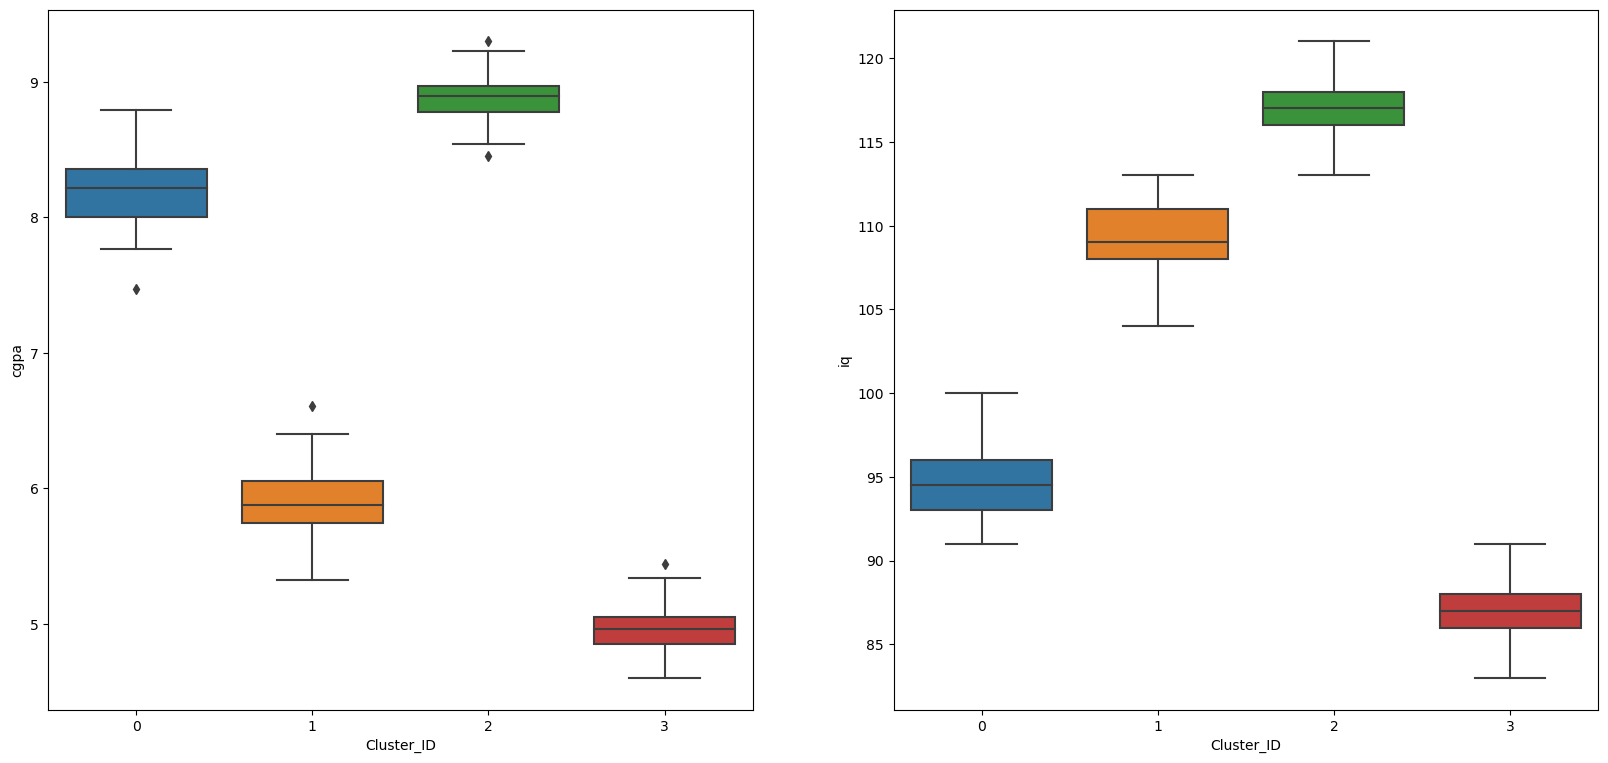

In [26]:
plt.figure(figsize=(20, 20))
plt.subplot(2,2,1)
sns.boxplot(x='Cluster_ID',y='cgpa',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='Cluster_ID',y='iq',data=df)

# HIERARCHICAL CLUSTERING

In [27]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

* Linkage : It is a parameter in Agglomerative Clustering to select the type of Agglomerative Clustering.


* There are 4 types of Agglomerative Clustering / Linkage Parameter :-


* 1) Min (single)


* 2) Max (complete)


* 3) Average


* 4) Ward

## 1) Single Linkage(min)

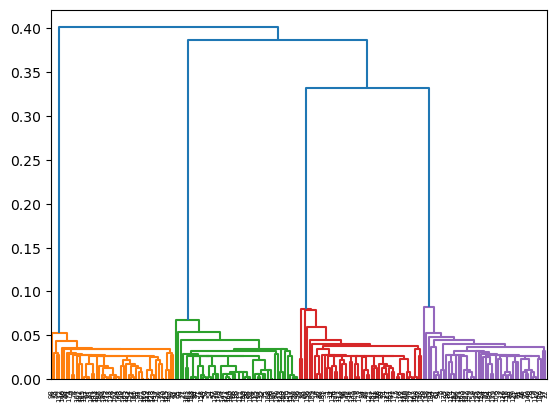

In [28]:
# single linkage 

mergings = linkage(scaled_data, method = 'single', metric = 'euclidean')
dendrogram(mergings)
plt.show()

In [29]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')
labels_=cluster.fit_predict(scaled_data)

Text(0.5, 1.0, 'PCA Plot of Clusters')

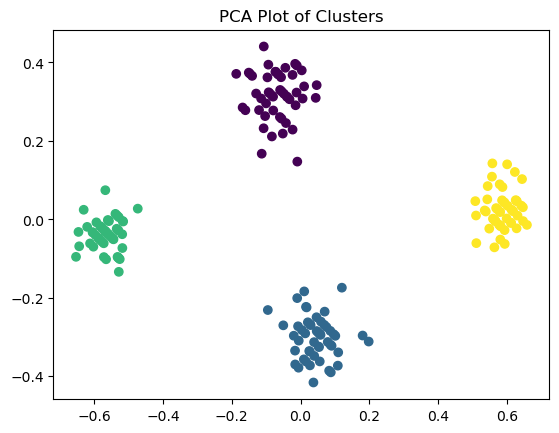

In [30]:
# Create a scatter plot of the clusters
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_)
plt.title("PCA Plot of Clusters")

## 2) Complete Linkage(max)

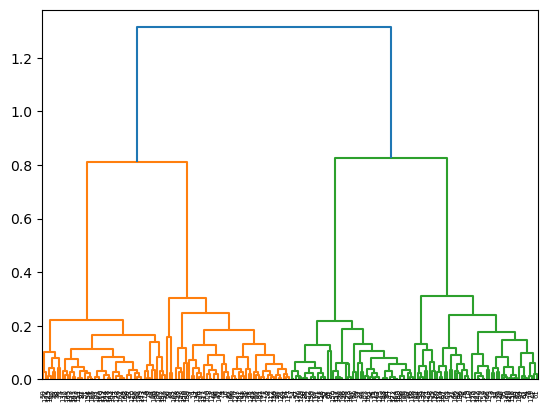

In [31]:
# complete linkage 

mergings = linkage(scaled_data, method = 'complete', metric = 'euclidean')
dendrogram(mergings)
plt.show()

In [32]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
labels=cluster.fit_predict(scaled_data)

Text(0.5, 1.0, 'PCA Plot of Clusters')

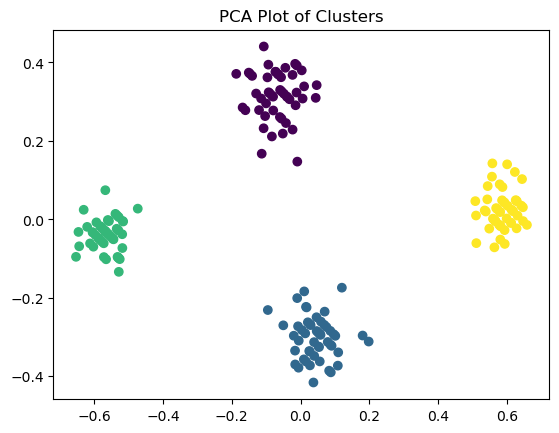

In [33]:
# Create a scatter plot of the clusters
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels)
plt.title("PCA Plot of Clusters")

## 3) Average Linkage

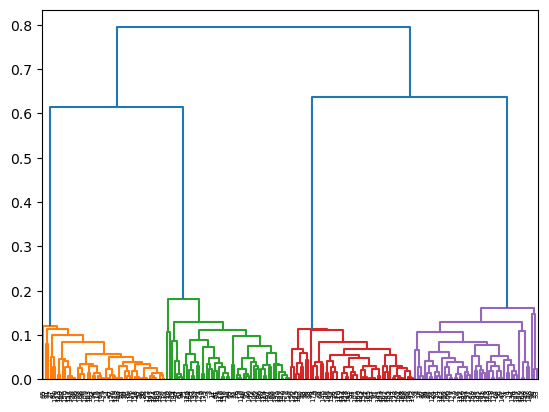

In [34]:
# Average linkage 

mergings = linkage(scaled_data, method = 'average', metric = 'euclidean')
dendrogram(mergings)
plt.show()

In [35]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')
labels_=cluster.fit_predict(scaled_data)

Text(0.5, 1.0, 'PCA Plot of Clusters')

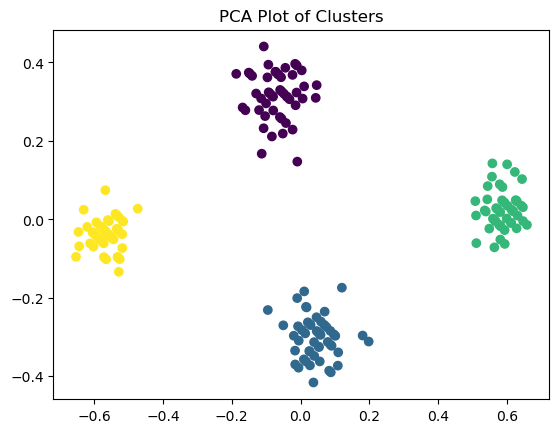

In [36]:
# Create a scatter plot of the clusters
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_)
plt.title("PCA Plot of Clusters")

## 4)Ward Linkage

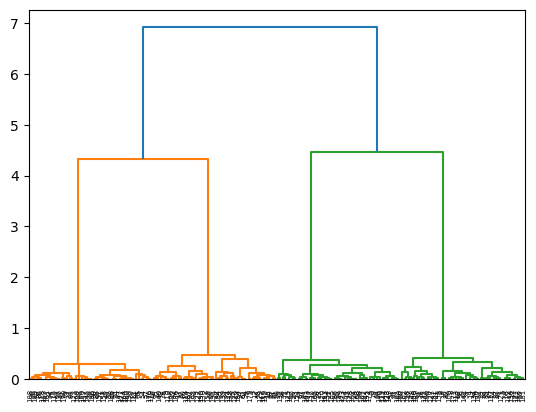

In [37]:
# Ward linkage 

mergings = linkage(scaled_data, method = 'ward', metric = 'euclidean')
dendrogram(mergings)
plt.show()

In [38]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
labels_=cluster.fit_predict(scaled_data)

Text(0.5, 1.0, 'PCA Plot of Clusters')

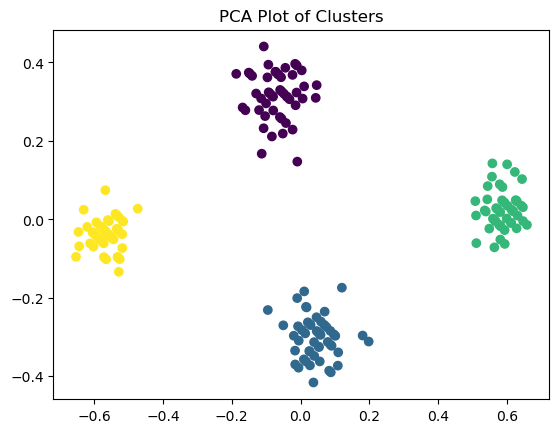

In [39]:
# Create a scatter plot of the clusters
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_)
plt.title("PCA Plot of Clusters")

# We see that K-Mean Clustering and Hierarchical Clustering both are best to form clusters in this dataset. So, We choose any of them.

In [40]:
# Assigning these label to dataset

df['cluster_labels'] = labels_
df.head()

,cgpa,iq,Cluster_ID,cluster_labels
0,5.13,88,3,2
1,5.90,113,1,1
2,8.36,93,0,0
3,8.27,97,0,0
4,5.45,110,1,1


# Visualization of Data with respect to cluster_labels 

<AxesSubplot:xlabel='cluster_labels', ylabel='iq'>

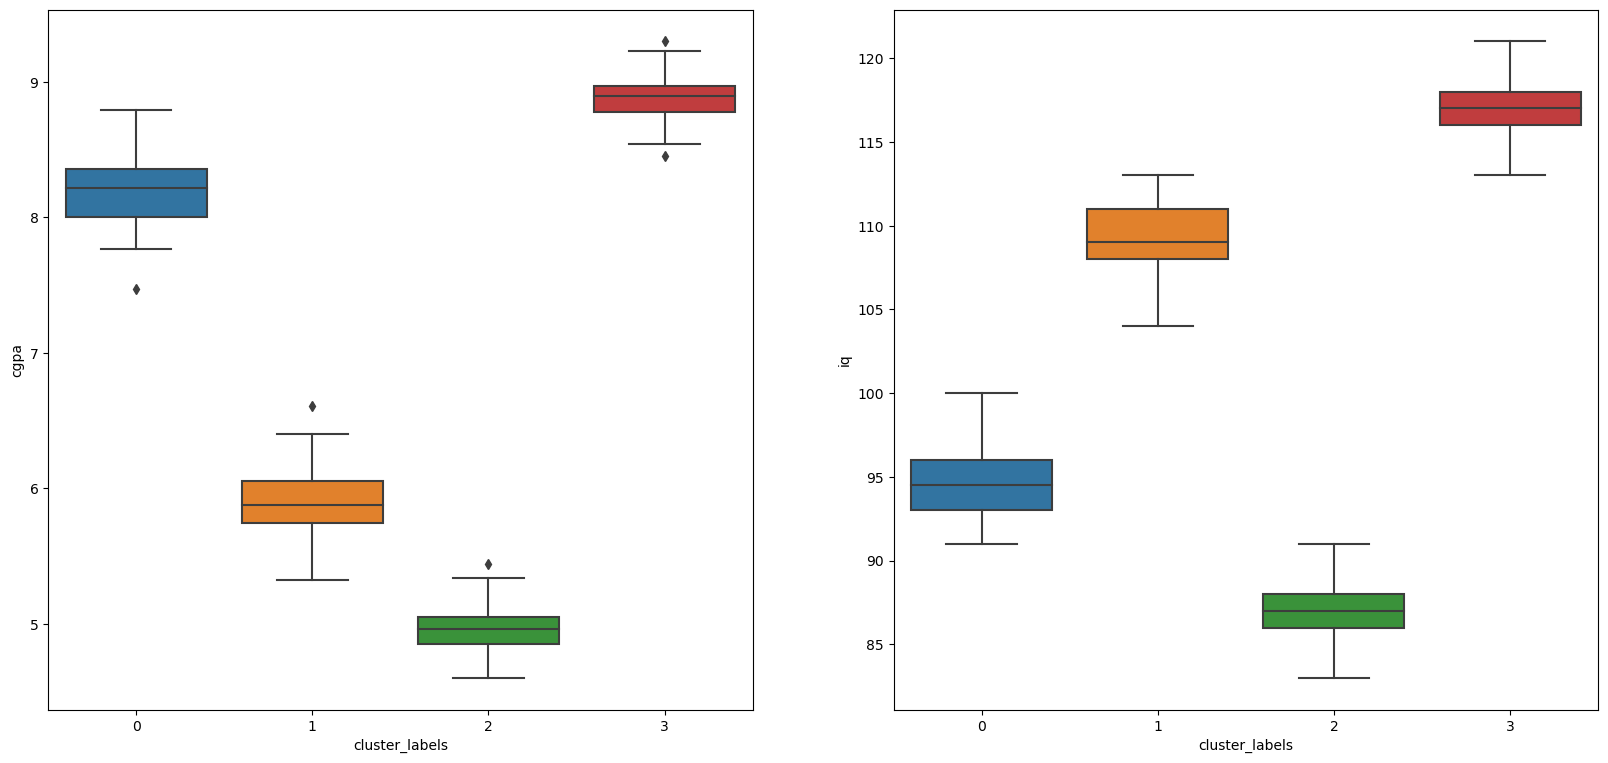

In [41]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.boxplot(x='cluster_labels',y='cgpa',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='cluster_labels',y='iq',data=df)

# Comparing Clustering Methods with their results on various datasets

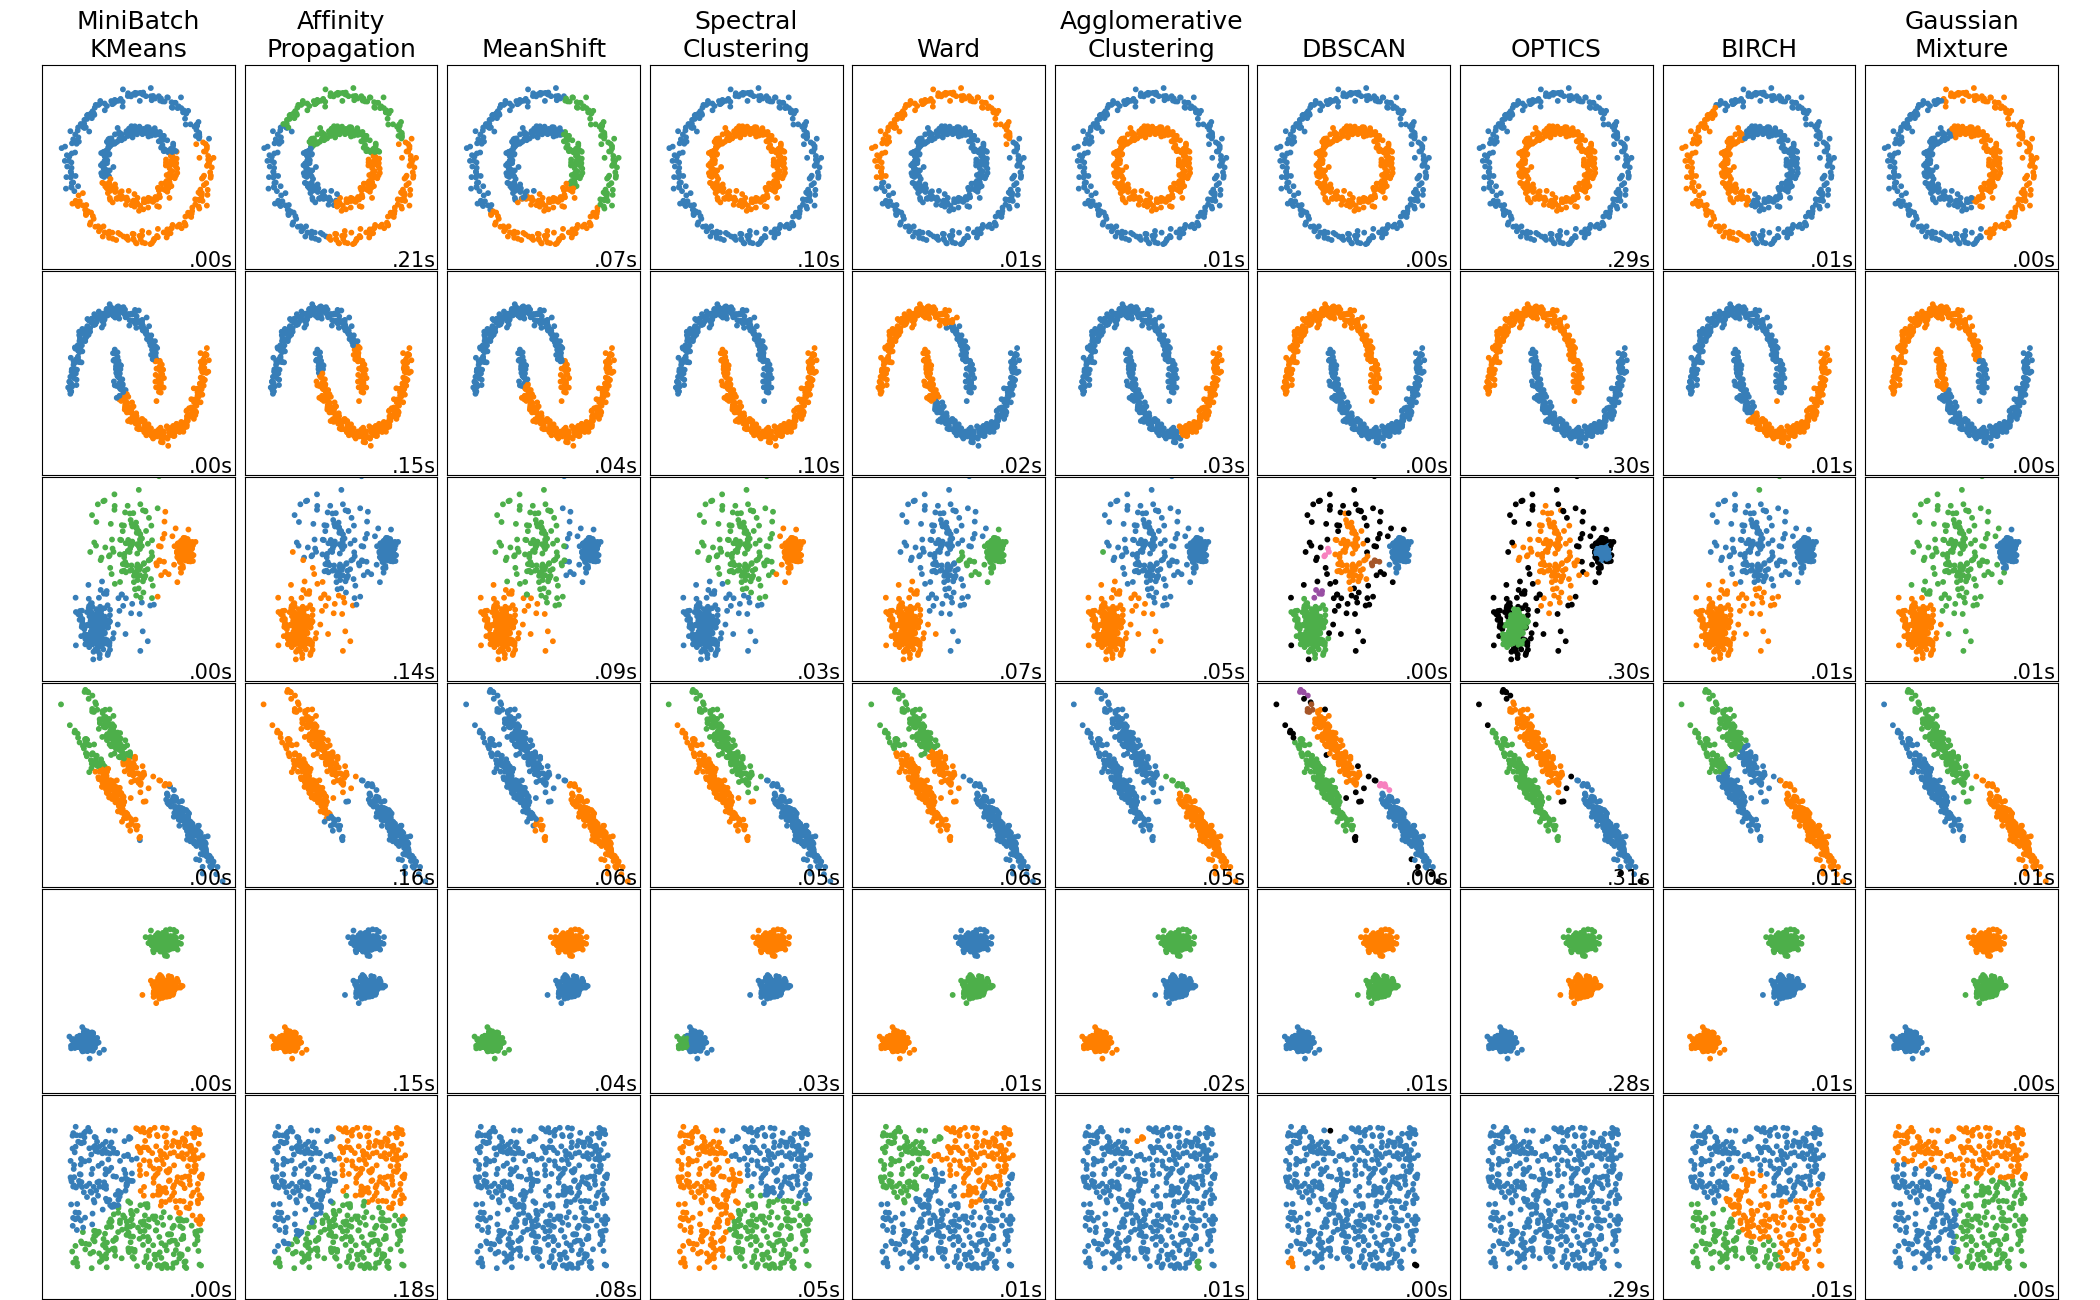

# DBSCAN

* In DBSCAN, there are 2 main parameters that can be adjusted, 'epsilon' (eps) and 'min_samples'.


* A good 'min_samples' number is two times the number of features (columns). We have 2 features so 'min_samples' value will be 4.


* To get a reasonable value for epsilon, we will again use the 'elbow method' between % of outlier points and epsilon.


* DBSCAN marks points that it thinks are outliers as being in a separate cluster labelled as '-1'.

In [42]:
from sklearn.cluster import DBSCAN

outlier_percent = [] 

for eps in np.linspace(0.001,3,50): # check 50 values of epsilon with equal distance between 0.001 and 3
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=4)
    dbscan.fit(scaled_data)
   
    # Percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(perc_outliers)

### Scree Plot of Epsilon Value against the Percentage of Points Classified as Outliers to determine the appropriate epsilon value.

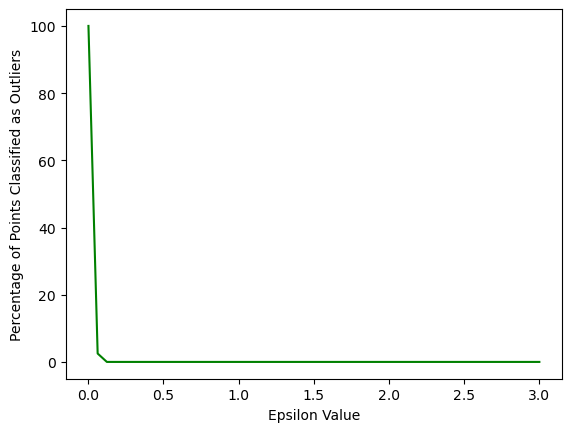

In [43]:
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent, color='green')
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value");

* The 'elbow' forms somewhere around epsilon = 0.1

### Grid search: Perform a grid search over a range of epsilon values and evaluate the clustering performance using a performance metric. The value of epsilon that gives the best performance can be selected as the appropriate value.

In [44]:
# Define range of epsilon values to try
eps_range = np.linspace(0.001,3,50)

# Define range of min_samples values to try
min_samples_range = range(1, 15)

# Create an empty dictionary to store the silhouette scores for each combination of hyperparameters
results = {}

# Loop over all combinations of hyperparameters and calculate the silhouette score
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(scaled_data)
        if len(set(dbscan.labels_)) > 1:
            score = silhouette_score(scaled_data, dbscan.labels_)
        else:
            score = -1
        results[(eps, min_samples)] = score

# Find the combination of hyperparameters that gives the highest silhouette score
best_eps, best_min_samples = max(results, key=results.get)
best_score = results[(best_eps, best_min_samples)]

# Print the best hyperparameters and the corresponding silhouette score
print(f"Best hyperparameters: eps={best_eps}, min_samples={best_min_samples}")
print(f"Silhouette score: {best_score}")

Best hyperparameters: eps=0.12340816326530613, min_samples=1
Silhouette score: 0.8589779579986927


The best eps=0.12340816326530613, min_samples=1. Create the clusters using this values and see the result.

### Scree Plot of Epsilon Value against the Epsilon values to determine the appropriate epsilon value.

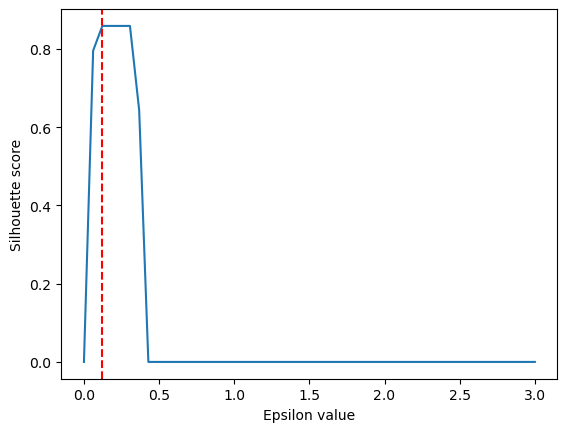

Optimal epsilon value: 0.12340816326530613
Optimal silhouette score: 0.8589779579986927


In [45]:
# Define a range of epsilon values to try
eps_range = np.linspace(0.001, 3, 50)

# Initialize arrays to store the silhouette scores for each epsilon value
silhouette_scores = np.zeros_like(eps_range)

# Loop over the epsilon values and compute the silhouette scores for each
for i, eps in enumerate(eps_range):
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(scaled_data)
    unique_labels = np.unique(labels)
    if len(unique_labels) > 1:
        silhouette_scores[i] = silhouette_score(scaled_data, labels)

# Find the index of the maximum silhouette score and corresponding optimal epsilon value
optimal_index = np.argmax(silhouette_scores)
optimal_eps = eps_range[optimal_index]
optimal_score = silhouette_scores[optimal_index]

# Plot the scree of the silhouette scores
plt.plot(eps_range, silhouette_scores)
plt.xlabel("Epsilon value")
plt.ylabel("Silhouette score")
plt.axvline(x=optimal_eps, color='r', linestyle='--')
plt.show()

print("Optimal epsilon value:", optimal_eps)
print("Optimal silhouette score:", optimal_score)

### Scree Plot of minimum points against the Silhouette Score to determine the appropriate min_samples value.

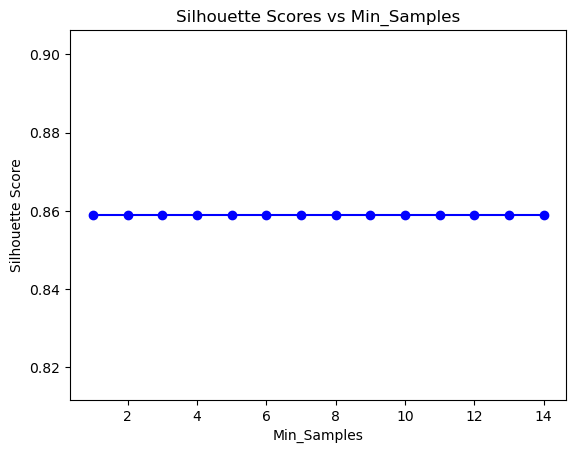

In [46]:
# range of min_samples values to evaluate
min_samples_range = range(1, 15)

# calculate silhouette score for different min_samples values
silhouette_scores = []
for min_samples in min_samples_range:
    dbscan = DBSCAN(eps=0.1, min_samples=min_samples)
    cluster_labels = dbscan.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# plot the silhouette scores for different min_samples values
plt.plot(min_samples_range, silhouette_scores, 'bo-')
plt.title('Silhouette Scores vs Min_Samples')
plt.xlabel('Min_Samples')
plt.ylabel('Silhouette Score')
plt.show()

In [47]:
dbscan = DBSCAN(eps=0.1,min_samples=1)
dbscan.fit(scaled_data)

DBSCAN(eps=0.1, min_samples=1)

In [48]:
labels_ = dbscan.labels_
labels_

array([0, 1, 2, 2, 1, 1, 2, 3, 1, 2, 0, 1, 2, 0, 1, 2, 1, 2, 1, 1, 2, 0,
       2, 0, 0, 2, 0, 3, 2, 1, 3, 1, 3, 1, 2, 2, 3, 1, 0, 1, 0, 2, 2, 0,
       3, 3, 2, 1, 3, 1, 0, 0, 3, 2, 3, 1, 1, 3, 1, 3, 1, 2, 2, 3, 0, 3,
       2, 0, 1, 2, 1, 3, 2, 0, 1, 3, 1, 3, 0, 2, 2, 3, 1, 0, 3, 0, 3, 1,
       3, 1, 3, 3, 2, 0, 2, 2, 3, 2, 0, 3, 1, 0, 0, 3, 0, 0, 2, 0, 3, 3,
       2, 3, 1, 1, 2, 3, 2, 1, 3, 0, 0, 1, 2, 3, 2, 0, 2, 1, 0, 2, 2, 1,
       0, 0, 1, 3, 1, 0, 2, 2, 2, 0, 1, 0, 0, 3, 0, 3, 1, 0, 3, 0, 3, 3,
       0, 2, 1, 3, 1, 2, 0, 3, 1, 2, 3, 0, 1, 0, 0, 3, 3, 1, 3, 0, 0, 2,
       3, 1, 0, 3, 3, 1, 1, 1, 2, 0, 2, 2, 3, 1, 2, 2, 0, 0, 2, 0, 3, 1,
       1, 3], dtype=int64)

In [49]:
df['labels'] = labels_

df.head()

,cgpa,iq,Cluster_ID,cluster_labels,labels
0,5.13,88,3,2,0
1,5.90,113,1,1,1
2,8.36,93,0,0,2
3,8.27,97,0,0,2
4,5.45,110,1,1,1


In [50]:
df.drop(['Cluster_ID','cluster_labels'],axis=1,inplace=True)
df.head()

,cgpa,iq,labels
0,5.13,88,0
1,5.90,113,1
2,8.36,93,2
3,8.27,97,2
4,5.45,110,1


### Visualizatng the Clusters

Text(0.5, 1.0, 'PCA Plot of Clusters')

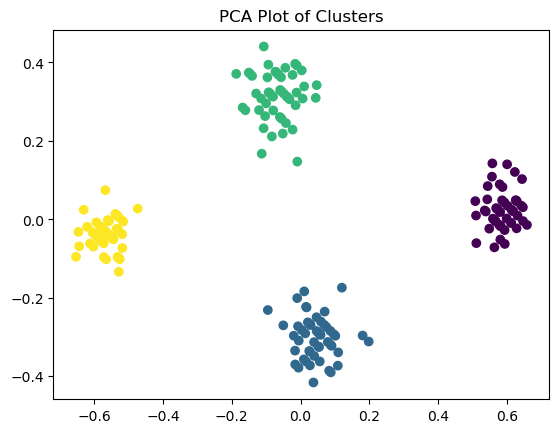

In [51]:
# Create a scatter plot of the clusters
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_)
plt.title("PCA Plot of Clusters")

### In this dataset all clustering techniques performs well.

<AxesSubplot:xlabel='labels', ylabel='cgpa'>

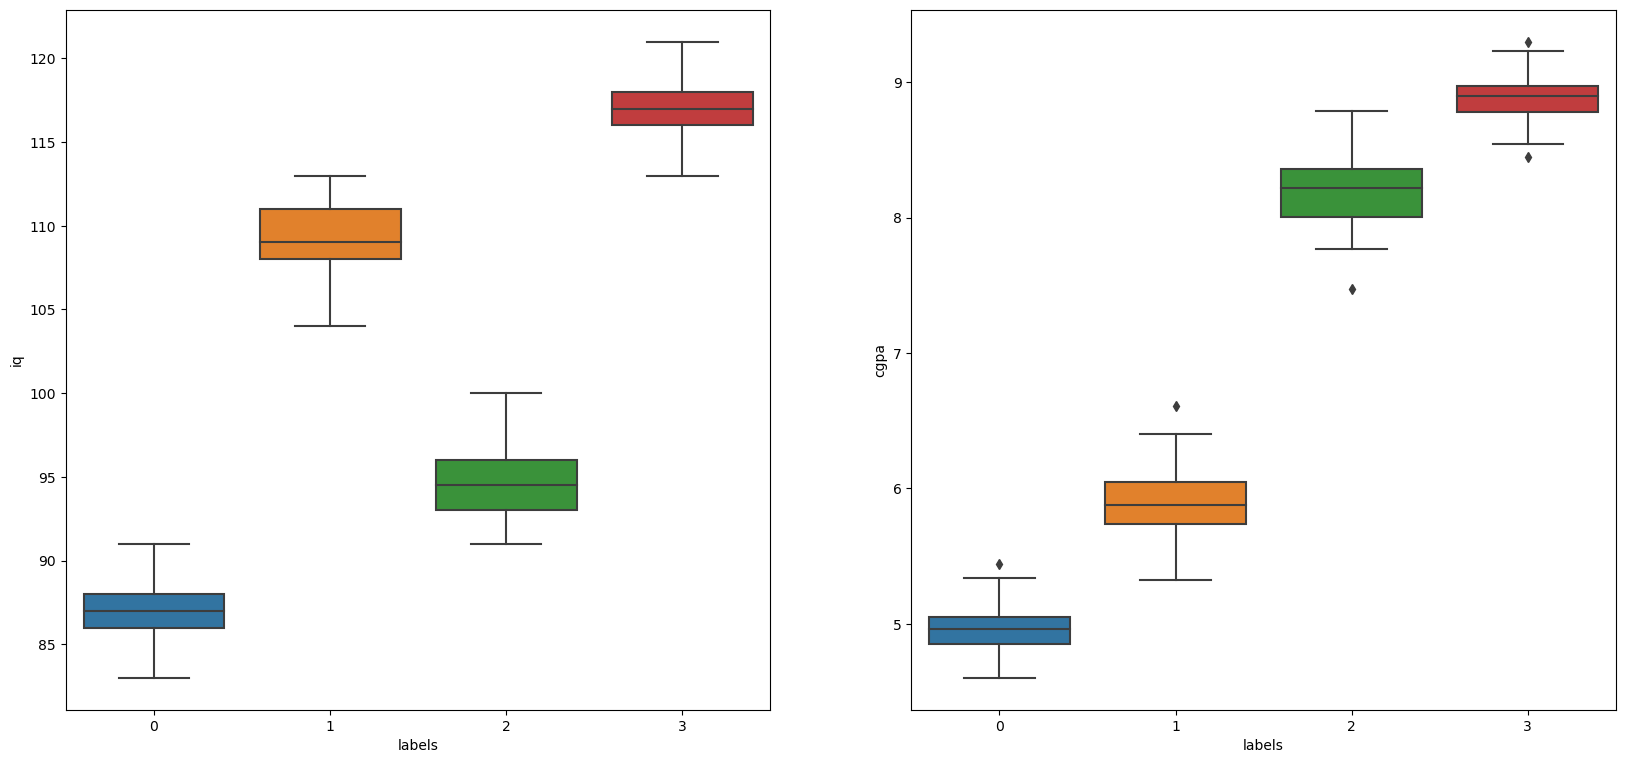

In [52]:
plt.figure(figsize=(20, 20))
plt.subplot(2,2,1)
sns.boxplot(x='labels',y='iq',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='labels',y='cgpa',data=df)

In [53]:
df['labels'] = df['labels'].map({
    0: 'Low IQ and Low CGPA', 
    1: 'Average IQ and Low CGPA', 
    2: 'Low IQ and Average CGPA',
    3: 'High IQ and High CGPA'}) 

df.head()

,cgpa,iq,labels
0,5.13,88,Low IQ and Low CGPA
1,5.90,113,Average IQ and Low CGPA
2,8.36,93,Low IQ and Average CGPA
3,8.27,97,Low IQ and Average CGPA
4,5.45,110,Average IQ and Low CGPA
